In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from Deliverable_5_12.LinearMPC.MPCVelControl import MPCVelControl as MPCVelControlOF
from Deliverable_4_1.LinearMPC.MPCVelControl import MPCVelControl as MPCVelControlBaseline

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time

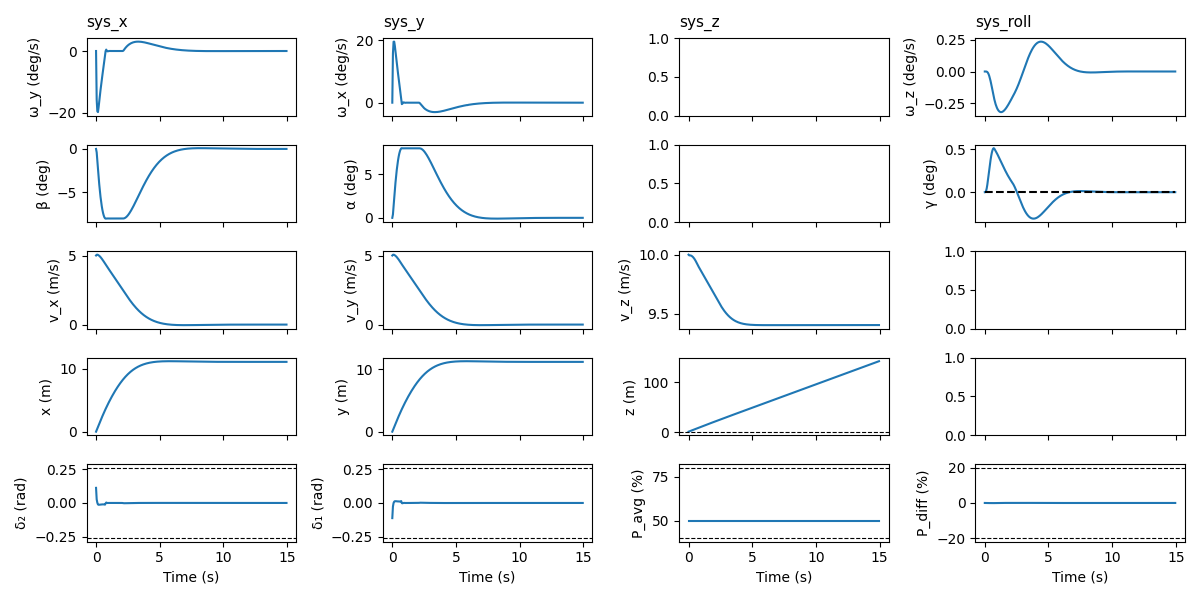

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 

/home/rimelq/Anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating time 2.20: 
Simulating time 2.25: 
Simulating time 2.30: 
Simulating time 2.35: 
Simulating time 2.40: 
Simulating time 2.45: 
Simulating time 2.50: 
Simulating time 2.55: 
Simulating time 2.60: 
Simulating time 2.65: 
Simulating time 2.70: 
Simulating time 2.75: 
Simulating time 2.80: 
Simulating time 2.85: 
Simulating time 2.90: 
Simulating time 2.95: 
Simulating time 3.00: 
Simulating time 3.05: 
Simulating time 3.10: 
Simulating time 3.15: 
Simulating time 3.20: 
Simulating time 3.25: 
Simulating time 3.30: 
Simulating time 3.35: 
Simulating time 3.40: 
Simulating time 3.45: 
Simulating time 3.50: 
Simulating time 3.55: 
Simulating time 3.60: 
Simulating

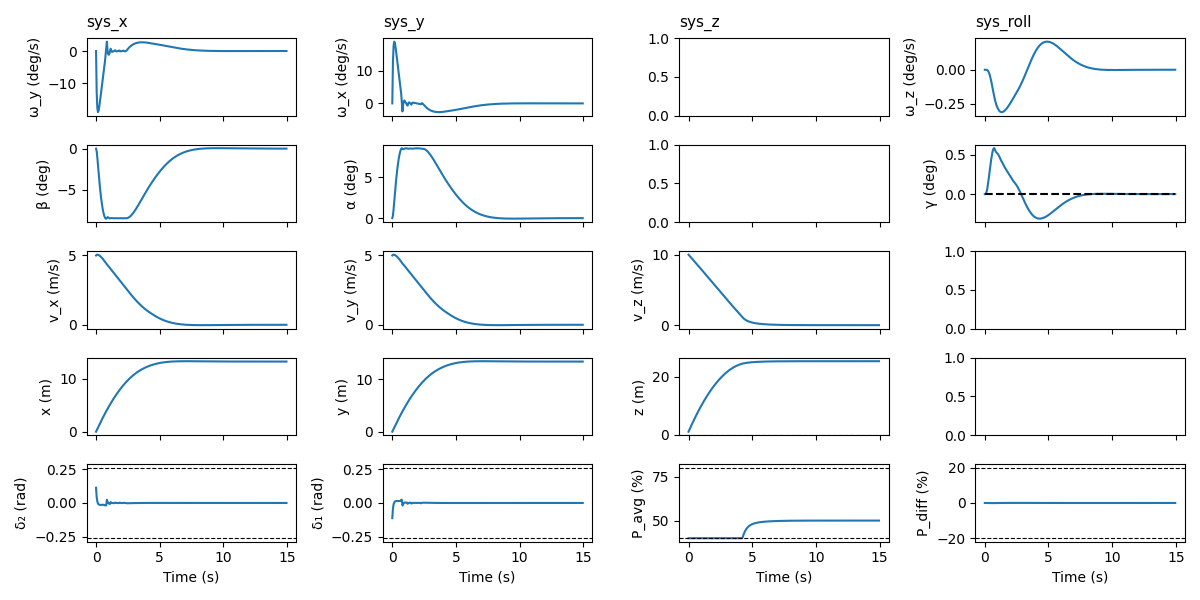

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x73d71c8c7c80>,
 'scene_objects': {'rocket_actor': Actor (0x73d71c7d68c0)
    Center:                     (0.32006999999999997, -0.0015085000000000237, 1.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -6.402E-01, 1.280E+00
    Y Bounds                    -1.

In [3]:
import matplotlib.pyplot as plt

Ts = 0.05
H = 6.0
sim_time = 15.0

x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1], dtype=float)

x_target = np.zeros(12, dtype=float)
x_target[9:12] = np.nan 

rocket_b = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc_b = MPCVelControlBaseline().new_controller(rocket_b, Ts, H)

rocket_b.mass = 1.5
rocket_b.fuel_rate = 0.0

t_cl_b, x_cl_b, u_cl_b, t_ol_b, x_ol_b, u_ol_b, ref_b = rocket_b.simulate_control(
    mpc_b, sim_time, H, x0, x_target=x_target, method="nonlinear"
)

print("\n"*3)
print("Baseline Part 4_1 MPC (no offset-free) results:")
print("\n"*2)
plot_static_states_inputs(t_cl_b[:-1], x_cl_b[:, :-1], u_cl_b, Ref=ref_b[:, :-1])

rocket_of = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc_of = MPCVelControlOF().new_controller(rocket_of, Ts, H)

rocket_of.mass = 1.5
rocket_of.fuel_rate = 0.0

mpc_of.mpc_z.reset_estimator()

t_cl_of, x_cl_of, u_cl_of, t_ol_of, x_ol_of, u_ol_of, ref_of = rocket_of.simulate_control(
    mpc_of, sim_time, H, x0, x_target=x_target, method="nonlinear"
)

print("\n"*3)
print("Part 5_1 MPC with offset-free results:")
print("\n"*2)
plot_static_states_inputs(t_cl_of[:-1], x_cl_of[:, :-1], u_cl_of, Ref=ref_of[:, :-1])

vis = RocketVis(rocket_of, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl_of[:-1],
    x_cl_of[:, :-1],
    u_cl_of,
    Ref=ref_of[:, :-1],
    T_ol=t_ol_of[..., :-1],
    X_ol=x_ol_of,
    U_ol=u_ol_of,
)


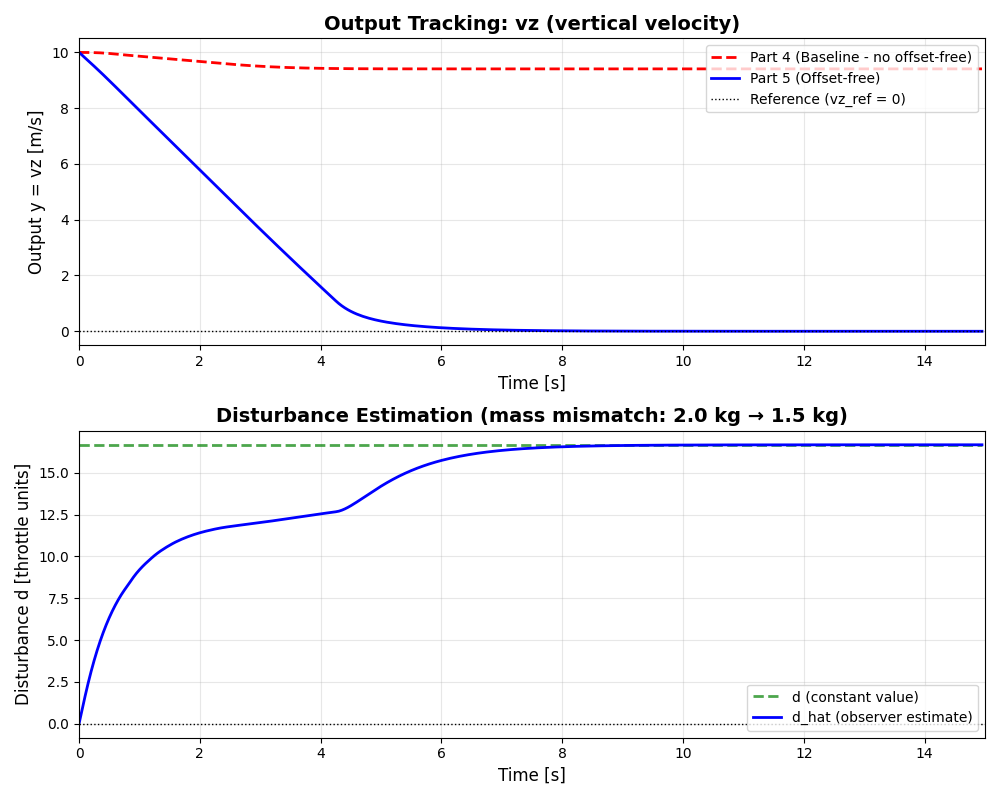


Output y = vz:
  Part 4 final: +9.4055 m/s (steady-state offset)
  Part 5 final: -0.0001 m/s (offset-free tracking)


In [ ]:
# Output and Disturbance Plot

d_hat, vz_hat = mpc_of.mpc_z.get_estimator_logs()

Ad = float(mpc_of.mpc_z._A_disc)
Bd = float(mpc_of.mpc_z._B_disc)
xs_vz = float(mpc_of.mpc_z.xs[0])
us_pavg = float(mpc_of.mpc_z.us[0])

vz_of = x_cl_of[8, :]       
vz_b = x_cl_b[8, :]         
u_pavg = u_cl_of[2, :]      

e_k = vz_of[:-1] - xs_vz
e_kp1 = vz_of[1:] - xs_vz
du_k = u_pavg - us_pavg
d_true_proxy = (e_kp1 - Ad * e_k - Bd * du_k) / Bd

K = min(len(d_true_proxy), len(d_hat))
t = t_cl_of[:K]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

ax1 = axes[0]
ax1.plot(t_cl_b[:-1], vz_b[:-1], 'r--', linewidth=2, label='Part 4 (Baseline - no offset-free)')
ax1.plot(t_cl_of[:-1], vz_of[:-1], 'b-', linewidth=2, label='Part 5 (Offset-free)')
ax1.axhline(0, color='k', linestyle=':', linewidth=1, label='Reference (vz_ref = 0)')
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Output y = vz [m/s]', fontsize=12)
ax1.set_title('Output Tracking: vz (vertical velocity)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10, loc='upper right')
ax1.set_xlim([0, sim_time])

ax2 = axes[1]
ax2.plot(t, d_true_proxy[-1] * np.ones_like(t), 'g--', linewidth=2, label='d (constant value)', alpha=0.7)
ax2.plot(t, d_hat[:K], 'b-', linewidth=2, label='d_hat (observer estimate)')
ax2.axhline(0, color='k', linestyle=':', linewidth=1)
ax2.set_xlabel('Time [s]', fontsize=12)
ax2.set_ylabel('Disturbance d [throttle units]', fontsize=12)
ax2.set_title('Disturbance Estimation (mass mismatch: 2.0 kg → 1.5 kg)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='lower right')
ax2.set_xlim([0, sim_time])

plt.tight_layout()
plt.show()

print(f"\nOutput y = vz:")
print(f"  Part 4 final: {vz_b[-1]:+.4f} m/s (steady-state offset)")
print(f"  Part 5 final: {vz_of[-1]:+.4f} m/s (offset-free tracking)")
